In [26]:
[범주형자료분석팀]심현구_클린업 _2주차_패키지

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels
import math

Chapter1

문제1. Train, test 데이터를 불러온 뒤 데이터의 구조를 파악하세요.

In [2]:
train = pd.read_csv('C:/Users/mrg07/Desktop/99shimshim/SKKU/PSAT/클린업/week2/week2_package/train.csv')
test = pd.read_csv('C:/Users/mrg07/Desktop/99shimshim/SKKU/PSAT/클린업/week2/week2_package/test.csv')

train.head()

,ID_code,price,carat,cut,color,clarity,depth,table,x,y,z
0,train_1,878,0.30,Premium,G,VVS2,62.9,55.0,4.28,4.24,2.68
1,train_2,3183,0.70,Premium,D,VS1,60.9,60.0,5.75,5.71,3.49
2,train_3,624,0.30,Ideal,G,VS1,62.0,56.0,4.29,4.32,2.67
3,train_4,743,0.33,Premium,H,VS1,61.9,58.0,4.45,4.43,2.75
4,train_5,526,0.25,Very Good,F,IF,63.3,59.0,3.99,4.04,2.54


In [3]:
train.tail()

,ID_code,price,carat,cut,color,clarity,depth,table,x,y,z
21702,train_21703,630,0.40,Very Good,G,SI2,62.9,57.0,4.68,4.70,2.95
21703,train_21704,2977,0.81,Ideal,F,SI1,61.9,57.0,5.98,6.01,3.71
21704,train_21705,6443,1.36,Ideal,D,SI2,61.2,57.0,7.15,7.19,4.39
21705,train_21706,11487,1.51,Good,E,SI1,62.8,59.0,7.16,7.20,4.51
21706,train_21707,14799,2.01,Fair,G,SI2,63.8,59.0,7.77,7.87,4.99


In [4]:
train.info()
train.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21707 entries, 0 to 21706
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ID_code  21707 non-null  object 
 1   price    21707 non-null  int64  
 2   carat    21707 non-null  float64
 3   cut      21707 non-null  object 
 4   color    21707 non-null  object 
 5   clarity  21707 non-null  object 
 6   depth    21010 non-null  float64
 7   table    21707 non-null  float64
 8   x        21707 non-null  float64
 9   y        21707 non-null  float64
 10  z        21707 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.8+ MB


,price,carat,depth,table,x,y,z
count,21707.000000,21707.000000,21010.000000,21707.000000,21707.000000,21707.000000,21707.000000
mean,3939.077487,0.798718,61.748415,57.457350,5.732041,5.733807,3.539983
std,4009.460040,0.475534,1.410605,2.239175,1.125419,1.117037,0.722429
min,326.000000,0.200000,50.800000,49.000000,0.000000,0.000000,0.000000
25%,949.000000,0.400000,61.000000,56.000000,4.710000,4.720000,2.910000
50%,2387.000000,0.700000,61.800000,57.000000,5.700000,5.710000,3.520000
75%,5355.500000,1.050000,62.500000,59.000000,6.540000,6.540000,4.040000
max,18818.000000,4.500000,73.600000,79.000000,10.230000,10.160000,31.800000


문제2. Train과 Test 데이터에서 ID_code는 필요하지 않으니 해당 열을 삭제해주세요.

In [5]:
train = train.drop(columns="ID_code")
test = test.drop(columns="ID_code")

문제 3. Train 과 Test 데이터에서 결측치가 존재하는지 확인한 후, 이를 다음과 같이 시각화해주세요.

<Axes: >

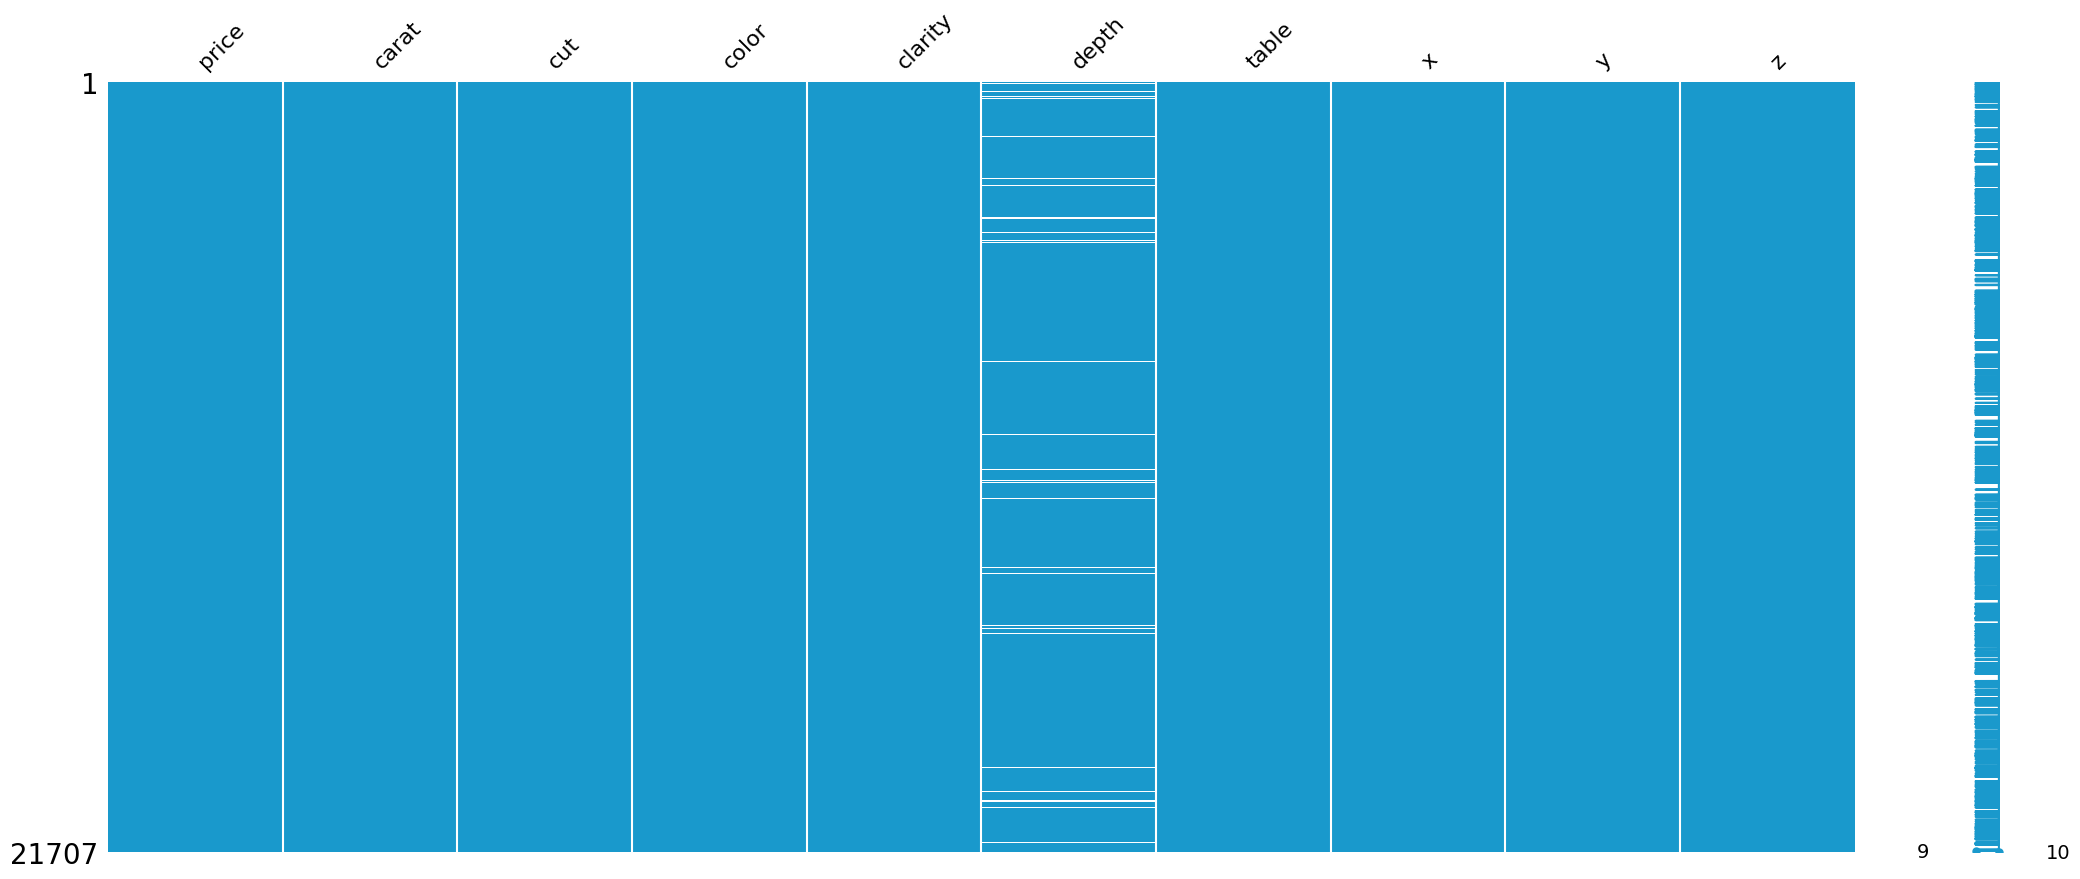

In [6]:
import missingno as msno

missing = train.isnull().sum()

msno.matrix(train, color=(0.1, 0.6, 0.8))

<Axes: >

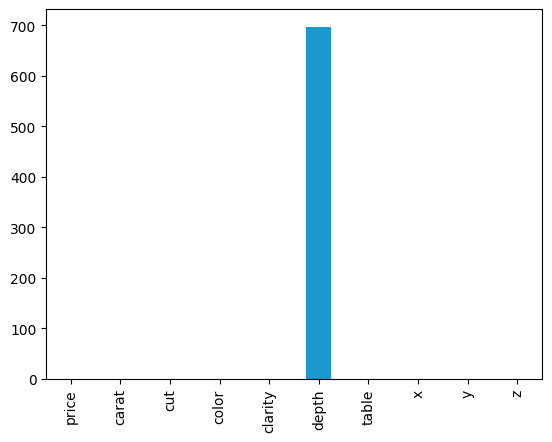

In [7]:
missing.plot.bar(color=(0.1, 0.6, 0.8))

문제4. 문제 1부터 문제 3에서 얻어낸 정보들을 바탕으로, 데이터에서 각 변수들이 범주형 변수인지 수치형 변수인지 판단해보고,
그 이유에 대해서 간략하게 서술해주세요.

describe 함수는 수치형 변수에 대해서만 결과를 출력하기 때문에 describe의 output에 나타난 변수들이 수치형이라고 할 수 있다.
따라서, price, carat, depth, table, x, y, z 는 수치형, 나머지는 범주형 변수이다.

문제5. 데이터에서 수치형 변수들만을 사용하여, 수치형 변수들 간의 상관관계를 다음과 같은 상관관계 Plot을
통해 확인해주세요. 그리고 그 결과에 대해서 간단히 해석해주세요.

          price     carat     depth     table         x         y         z
price  1.000000  0.921996 -0.009134  0.132846  0.885550  0.887085  0.846189
carat  0.921996  1.000000  0.032423  0.189156  0.976114  0.974987  0.936281
depth -0.009134  0.032423  1.000000 -0.294357 -0.020760 -0.024621  0.099855
table  0.132846  0.189156 -0.294357  1.000000  0.202117  0.195981  0.153694
x      0.885550  0.976114 -0.020760  0.202117  1.000000  0.998524  0.952215
y      0.887085  0.974987 -0.024621  0.195981  0.998524  1.000000  0.951941
z      0.846189  0.936281  0.099855  0.153694  0.952215  0.951941  1.000000


Text(0.5, 1.05, 'Correlation of Numeric Variables')

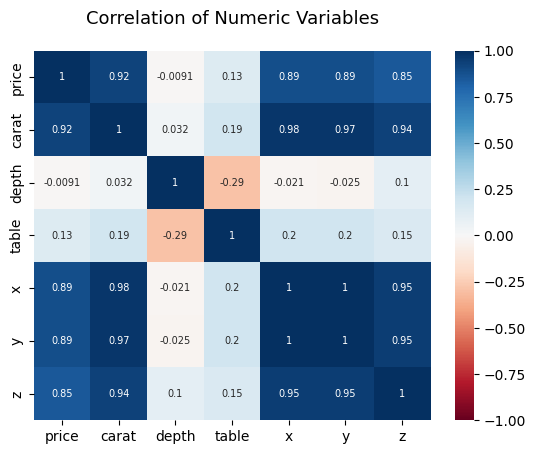

In [8]:
train_num = train.loc[:,['price','carat','depth', 'table', 'x', 'y', 'z']]
corr1 = train_num.corr(method = 'pearson')

print(corr1)

graph1 = sns.heatmap(corr1, cmap='RdBu', square = False, annot = True, annot_kws = {"size" : 7}, center = 0, vmin = -1)
plt.title("Correlation of Numeric Variables", y = 1.05, size = 13)

문제6. 수치형 변수에 대해서 다음과 같이 시각화를 진행해주세요. 이후, 시각화한 Plot을 통해 확인할 수 있
는 점을 간단히 서술해주세요

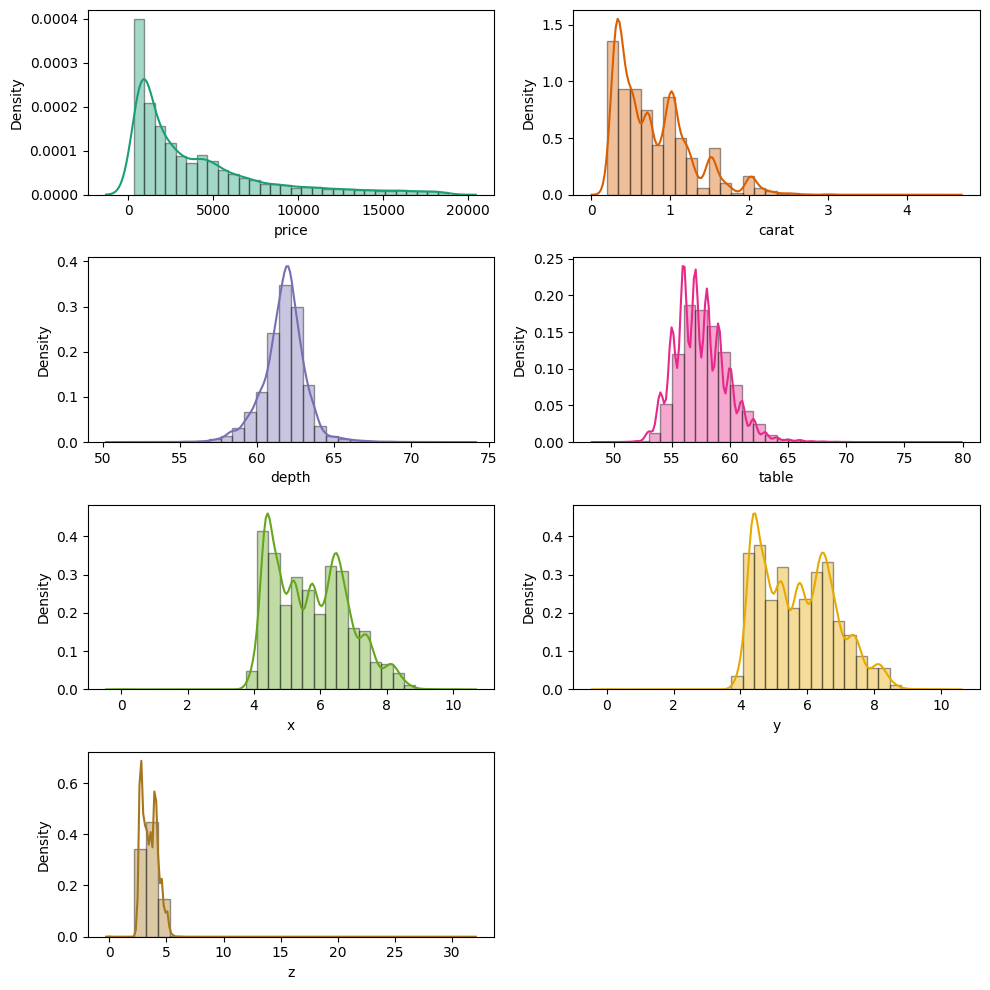

In [9]:
import warnings
warnings.filterwarnings('ignore')

colors = ["#1B9E77","#D95F02","#7570B3","#E7298A","#66A61E","#E6AB02","#A6761D","#666666"]
sns.set_palette(sns.color_palette(colors))

fig = plt.figure(figsize = (10,10))

plt.subplot(421)
sns.distplot(train_num['price'], color = colors[0], hist_kws=dict(edgecolor="black", linewidth=1), bins=30)

plt.subplot(422)
sns.distplot(train_num['carat'], color = colors[1], hist_kws=dict(edgecolor="black", linewidth=1), bins=30)

plt.subplot(423)
sns.distplot(train_num['depth'], color = colors[2], hist_kws=dict(edgecolor="black", linewidth=1), bins=30)

plt.subplot(424)
sns.distplot(train_num['table'], color = colors[3], hist_kws=dict(edgecolor="black", linewidth=1), bins=30)

plt.subplot(425)
sns.distplot(train_num['x'], color = colors[4], hist_kws=dict(edgecolor="black", linewidth=1), bins=30)

plt.subplot(426)
sns.distplot(train_num['y'], color = colors[5], hist_kws=dict(edgecolor="black", linewidth=1), bins=30)

plt.subplot(427)
sns.distplot(train_num['z'], color = colors[6], hist_kws=dict(edgecolor="black", linewidth=1), bins=30)

plt.tight_layout()



문제7. 범주형 변수에 대해서 다음과 같이 시각화를 진행해주세요. 이후, 시각화한 Plot을 통해 확인할 수 있는 점을 간단히 서술해주세요.

<Figure size 500x500 with 0 Axes>

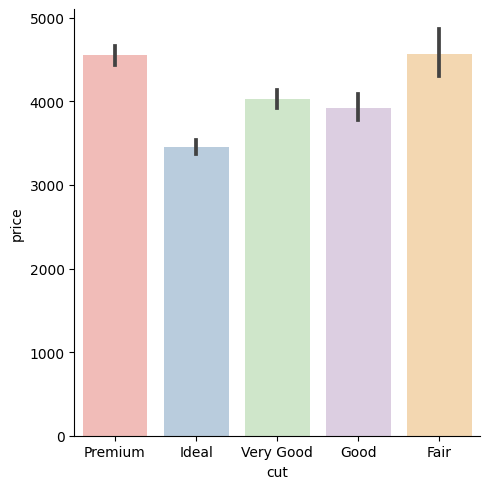

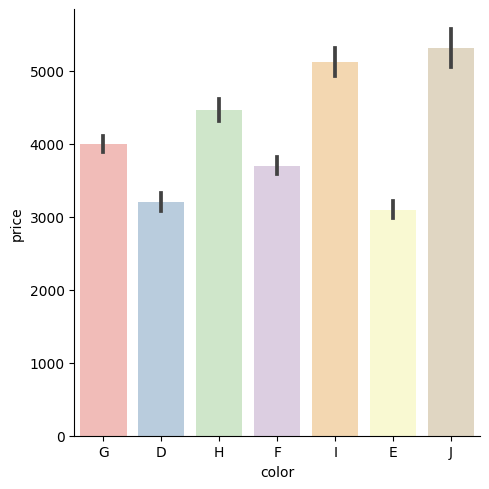

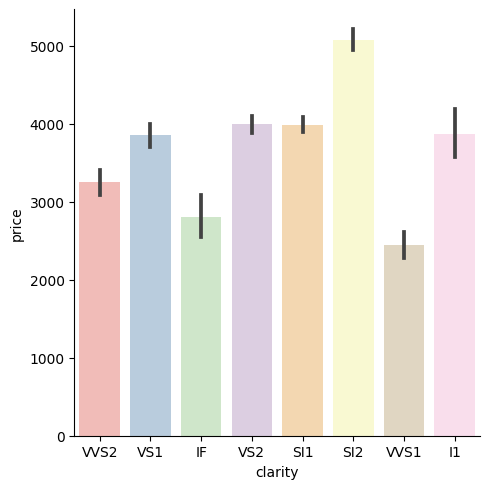

In [10]:
fig = plt.figure(figsize = (5,5))

sns.catplot(data = train, x = 'cut', y = 'price', palette = "Pastel1", kind = "bar")

sns.catplot(data = train, x = 'color', y = 'price', palette = "Pastel1", kind = "bar")

sns.catplot(data = train, x = 'clarity', y = 'price', palette = "Pastel1", kind = "bar")


문제8. 이후 데이터를 전처리하는 과정에서, Test Data에 전처리를 진행할 때 Train Set과 동일한 전처리를 진행해줘야 합니다.
이 이유와 더 나아가서 ‘Data Leakage’가 무엇인지 알아보고 간단히 서술하세요

우선 데이터를 train data와 test data로 분리하는 것은 과적합을 방지하기 위함이다. 
train data를 모델에 학습시킨 후 validation data로 최적의 하이퍼파라미터를 찾고, test data로 예측을 한다.
train data와 test data는 결국 같은 raw data에서 분리된 것이기 때문에 동일한 전처리를 해야 모델에 넣기 적합한 데이터가 된다.
그렇지 않으면 Data leakage가 발생할 수 있기 때문이다.

Data leakage는 학습 데이터가 타겟에 대한 정보를 가지고 있지만, 그 정보들을 실제 예측에 사용할 수 없는 경우 발생하는 문제이다.
학습 데이터, 심지어 validation 데이터에 대해서도 학습이 잘 되었지만 모델 배포후에는 제대로 동작하지 않는다는 의미이다. 

Data Leakage는 두 가지 원인으로 발생하게 된다.

Train-Test Contamination
Train 데이터와 Val 데이터를 제대로 구분하지 않았을 때 발생하게 된다.
Train data와 val data를 나누기 전에 전처리를 실행한다고 생각해보면, (결국, 전처리 하고 data split한다는 것)
당연히 모델의 검증 점수가 올라갈 수 밖에 없다. val data를 예측 방법에 통합했기 때문이라고 생각하면 된다.
그럼 특정 데이터에 대해서는 좋은 성능을 내겠지만, Unseen data에 대해서는 성능이 좋지 못하다.
결국 train-test set을 나누고 전처리를 하는 것이 좋으며, 이러한 문제는 pipeline을 이용하여 휴먼 에러를 방지할 수 있다.
특히 교차검증을 할 때는 이 pipeline을 이용하는 것이 아주 중요하다는 것을 기억하자.

Target Leakage
예측 시점에 사용할 수 없는 데이터가 데이터 셋에 포함되어 있을 경우 발생하게 된다.
예를 들어, target이 암의 발병 여부인데 데이터 셋에 항암치료라는 feature가 있다고 가정해보자.
항암 치료는 이미 암이 생긴 후에 하는 치료이기 때문에, target이 없이 항암치료라는 feature만 가지고 target를 유추할 수 있게 된다.
결국 target에 지나치게 영향을 주는 featrue는 제거를 해줌으로 데이터 누수를 방지해야한다.

[출처] https://velog.io/@73syjs/%EC%A0%95%EB%B3%B4%EC%9D%98-%EB%88%84%EC%88%98-%EB%8D%B0%EC%9D%B4%ED%84%B0-%EB%9E%AD%EA%B8%80%EB%A7%81

문제9. 문제 5부터 문제 7에서 얻어낸 정보들을 바탕으로, 앞서 Train과 Test 데이터에 나타나는 결측치를 적절하게 채워주세요.
이후, 결측치가 잘 대체되었는지 다시 한번 확인해보세요.

In [11]:
train = train.fillna(train.mean())
test = test.fillna(test.mean())

train.isnull().sum()

price      0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
dtype: int64

문제10. 범주형 변수들에 대해서 LabelEncoding을 진행하고, 이를 Train과 Test 모두에 적용해주세요.

In [12]:
from sklearn.preprocessing import LabelEncoder

encoder1 = LabelEncoder()
encoder1.fit(train['cut'])
train["cut"] = encoder1.transform(train['cut'])

encoder1.fit(train['color'])
train["color"] = encoder1.transform(train['color'])

encoder1.fit(train['clarity'])
train["clarity"] = encoder1.transform(train['clarity'])

encoder2 = LabelEncoder()
encoder2.fit(test['cut'])
test["cut"] = encoder2.transform(test['cut'])

encoder2.fit(test['color'])
test["color"] = encoder2.transform(test['color'])

encoder2.fit(test['clarity'])
test["clarity"] = encoder2.transform(test['clarity'])


In [13]:
train

,price,carat,cut,color,clarity,depth,table,x,y,z
0,878,0.30,3,3,7,62.9,55.0,4.28,4.24,2.68
1,3183,0.70,3,0,4,60.9,60.0,5.75,5.71,3.49
2,624,0.30,2,3,4,62.0,56.0,4.29,4.32,2.67
3,743,0.33,3,4,4,61.9,58.0,4.45,4.43,2.75
4,526,0.25,4,2,1,63.3,59.0,3.99,4.04,2.54
...,...,...,...,...,...,...,...,...,...,...
21702,630,0.40,4,3,3,62.9,57.0,4.68,4.70,2.95
21703,2977,0.81,2,2,2,61.9,57.0,5.98,6.01,3.71
21704,6443,1.36,2,0,3,61.2,57.0,7.15,7.19,4.39
21705,11487,1.51,1,1,2,62.8,59.0,7.16,7.20,4.51


Chapter 2 : XGBoost & LightGBM

문제1. 항상 동일한 결과를 얻기 위하여 Seed를 고정해주세요 (Seed: 3031)

In [14]:
import numpy as np

np.random.seed(3031) # Numpy로 시드 설정

문제2. Train 데이터를 5개의 Fold로 분리하세요.

In [15]:
from sklearn.model_selection import KFold

train_input = train.drop(columns=['price']) # 독립변수 : price를 제외한 나머지 변수들
train_target = train['price'] # 종속변수 : 예측해야 할 price 변수

kf = KFold(n_splits=5, shuffle=True) # 5개의 fold로 분리하는 KFold 객체로
kf.split(train_input, train_target) # 훈련데이터의 input과 target을 분리

<generator object _BaseKFold.split at 0x000002528D3932E0>

문제2. XGboost와 LightGBM이 어떤 모델인지 살펴보고, 트리를 분기함에 있어 어떠한 특징을 가지는지 
간단하게 설명해주세요.

XGBoost는 Gradient Boosting 알고리즘을 분산환경에서도 실행할 수 있도록 구현해놓은 라이브러리이다.
Regression, Classification 문제를 모두 지원하며, 성능과 자원 효율이 좋아서, 인기 있게 사용되는 알고리즘이다.
XGBoost는 여러개의 Decision Tree를 조합해서 사용하는 Ensemble 알고리즘이다.
Boosting 기법을 이용하여 구현한 알고리즘은 Gradient Boost 가 대표적인데
이 알고리즘을 병렬  학습이 지원되도록 구현한 라이브러리가 XGBoost 이다.

#https://bcho.tistory.com/1354

XGBoost는 분류, 회귀 문제에 모두 사용할 수 있는 강력한 모델입니다.
각 이터레이션에서 맞추지 못한 데이터에 가중치를 부여하여 모델을 학습시키는 부스팅(Boosting) 계열의 트리 모델입니다.
강력한 병렬 처리 성능과 자동 가지치기 알고리즘이 적용되어 Gradient Boosting Model 대비 빠른 속도를 갖습니다.
과적합 규제 기능(Regularization)의 이점이 있습니다.
또한 자체 교차 검증 알고리즘과 결측치 처리 기능을 가지고 있습니다.
균형 트리 분할 방식으로 모델을 학습하여 대칭적인 트리를 형성합니다.

#https://leehah0908.tistory.com/15

LightGBM의 메인 기술은 GOSS(Gradient-based One-Side Sampling)입니다. GOSS는 Information gain을 계산할 때 기울기가 작은(가중치가 작은)개체에 승수 상수를 적용하여 데이터를 증폭시킵니다.
이렇게 함으로써 데이터 분포를 많이 변경하지 안혹도 훈련이 덜 된 개체에 초점을 보다 잘 맞출 수 있습니다.
일반 GBM 계열의 트리는 level-wise(균형 트리 분할) 방식을 채택합니다. 항상 균형을 이루며 2진 분할을 하고 있습니다.
반면 LightGBM에서 채택한 leaf-wise(리프 중심 트리 분할)은 트리가 깊어지면서 소요되는 시간과 메모리 모두를 절약 할 수 있었습니다.

#https://statinknu.tistory.com/33

문제3. XGBoost와 LightGBM 패키지를 불러와주세요.

In [16]:
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

문제4. XGBoost와 LightGBM모델에서는 굉장히 하이퍼파라미터가 사용되고 있습니다. XGBoost와
LightGBM에 사용되는 하이퍼파라미터에는 무엇이 있으며, 각 하이퍼파라미터가 의미하는 바는 무엇인
지 서술해주세요.

XGBoost 모델의 주요 하이퍼파라미터는 아래와 같다. (사이킷런 API 기준)

--- 부스터 파라미터 ---

learning_rate : 학습률을 조정하는 파라미터로 0~1 사이의 값을 지정함.
n_estimators : 앙상블할 '약한 학습기(weak learner)'의 개수를 지정함. 개수 많을수록 성능이 일정수준까지 좋아지지만 수행시간 늘어남.
max_depth : 트리를 성장시킬 최대 깊이를 지정함. 보통 3~10 사이의 값을 적용함.
min_child_weight : 트리에서 추가적으로 가지를 나눌지 결정하기 위해 필요한 데이터들의 weight 총합을 설정함. 과적합을 조절하기 위한 것이며, 값이 클수록 분할을 자제함.
gamma : 트리의 리프노드를 추가적으로 나눌지 결정할 최소 손실 감소값을 설정함. 이 값보다 손실이 크게 감소되어야 리프노드를 분할하는 것. 값이 클수록 과적합이 감소하는 효과가 있음.
early_stopping_rounds : 조기종료를 위한 반복횟수를 설정함. 여기서 설정한 N번 반복하는 동안 성능평가지표가 향상되지 않으면 반복을 멈춤.
subsample : 트리가 커져서 과적합되는 것을 제어하기 위한 데이터 샘플링 비율을 지정함. 0~1 사이의 값으로 설정할 수 있는데, 예를 들어 0.5로 지정하면 전체 데이터 절반을 트리 생성에 사용함.
colsample_bytree : GBM의 max_features와 유사한 것으로, 트리 생성에 필요한 feature를 임의로 샘플링하는 데 사용함. feature가 많은 경우 이 설정을 하면 과적합을 조정할 수 있음.
--- 학습 파라미터 ---

objective : 최솟값을 가져야 할 손실함수를 설정함. 이진분류, 다중분류 등에 따라 다양한 손실함수를 사용할 수 있음.
eval_metric : 검증에 사용하는 함수를 설정함. 회귀는 rmse가 기본이고, 분류는 error가 기본임.

2) LightGBM 모델의 하이퍼파라미터
LightGBM 모델의 주요 하이퍼파라미터는 아래와 같다. (사이킷런 API 기준)

--- 부스터 파라미터 ---

learning_rate : (마찬가지로) 학습률을 조정하는 파라미터로 0~1 사이의 값을 지정함.
n_estimators : (마찬가지로) 앙상블할 '약한 학습기(weak learner)'의 개수를 지정함. 개수 많을수록 성능이 일정수준까지 좋아지지만 수행시간 늘어남.
max_depth : 트리를 성장시킬 최대 깊이를 지정함. LightGBM은 leaf wise 기반 모델이므로 깊이가 상대적으로 더 깊음.
min_child_samples : 리프노드(최종 결정 클래스)가 되기 위해서 최소한으로 필요한 레코드 수를 설정함. 역시 과적합을 조절하기 위한 파라미터임.
num_leaves : 하나의 트리가 가질 수있는 최대 리프 개수를 설정함. 기본값은 31임.
subsample : (마찬가지로) 트리가 커져서 과적합되는 것을 제어하기 위한 데이터 샘플링 비율을 지정함. 0~1 사이의 값으로 설정할 수 있는데, 예를 들어 0.5로 지정하면 전체 데이터 절반을 트리 생성에 사용함.
colsample_bytree : (마찬가지로) 트리 생성에 필요한 feature를 임의로 샘플링하는 데 사용함. feature가 많은 경우 이 설정을 하면 과적합을 조정할 수 있음.
--- 학습 파라미터 ---

objective : (마찬가지로) 최솟값을 가져야 할 손실함수를 설정함. 이진분류, 다중분류 등에 따라 다양한 손실함수를 사용할 수 있고, 기본값은 'reg:linear'임.
eval_metric : (마찬가지로) 검증에 사용하는 함수를 설정함. 회귀는 rmse가 기본이고, 분류는 error가 기본임.

문제5. GridSearch를 통해 하이퍼파라미터 튜닝을 진행하도록 하겠습니다.

In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, mean_squared_error

params = {'n_estimators':[300, 400, 500], 'max_depth':[2,4,6], 'learning_rate' : [0.05,0.1,0.2]} # 하이퍼파라미터 후보들 설정
gs1 = GridSearchCV(XGBRegressor(), params, n_jobs=-1, scoring=make_scorer(mean_squared_error, greater_is_better=False))

# [참고] scoring='neg_mean_squared_error'로도 평가지표를 RMSE로 설정할 수 있다고 함

In [23]:
gs1.fit(train_input, train_target)

GridSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bi...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.05, 0.1, 0.2],
                         'max_depth': [2, 4, 6],
                         'n_estimators': [300, 400, 500]},
             scoring=make_scorer(mean_squared_error, greater_is_better=False))

In [19]:
# LGBM에서 gridsearch 수행

params = {'n_estimators':[300, 400, 500], 'max_depth':[2,4,6], 'learning_rate' : [0.05,0.1,0.2]} # 하이퍼파라미터 후보들 설정
gs2 = GridSearchCV(LGBMRegressor(), params, n_jobs=-1, scoring=make_scorer(mean_squared_error, greater_is_better=False))

In [20]:
gs2.fit(train_input, train_target)

GridSearchCV(estimator=LGBMRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.05, 0.1, 0.2],
                         'max_depth': [2, 4, 6],
                         'n_estimators': [300, 400, 500]},
             scoring=make_scorer(mean_squared_error, greater_is_better=False))

문제7. GridSearch 결과 RMSE가 낮은 파라미터 조합을 각 모델별로 찾고, 해당 결과로 모델을 다시 
학습시키세요.

In [45]:
best_params_xgb = gs1.best_params_
# 최적의 파라미터를 다시 param_grid에 넣어서 학습시켜도 되지만, GridSearchCV에서는 그 파라미터로 학습한 최적의 모델을 반환해준다!
gs1_best = gs1.best_estimator_
best_est_xgb = gs1_best.score(train_input, train_target)

best_params_lgb = gs2.best_params_
gs2_best = gs2.best_estimator_
best_est_lgb = gs2_best.score(train_input, train_target)

print("xgb사용시 RMSE가 가장 낮은 파라미터 조합과 그때의 best estimator {0}, {1:.4f}". format(best_params_xgb, best_est_xgb))
print("lgb사용시 RMSE가 가장 낮은 파라미터 조합과 그때의 best estimator {0}, {1:.4f}". format(best_params_lgb, best_est_lgb))

xgb사용시 RMSE가 가장 낮은 파라미터 조합과 그때의 best estimator {'learning_rate': 0.05, 'max_depth': 6, 'n_estimators': 400}, 0.9919
lgb사용시 RMSE가 가장 낮은 파라미터 조합과 그때의 best estimator {'learning_rate': 0.05, 'max_depth': 6, 'n_estimators': 400}, 0.9880


문제8. 각 모델 별 변수의 중요도를 Importance plot으로 시각화하고, 어떤 변수가 보석의 크기에 영향을 미
치는지 서술해주세요.

In [46]:
print(gs1_best.feature_importances_) # 그냥 출력해보면 뭐가 뭔지 잘 안 보이니까

[0.34018296 0.00384813 0.02937866 0.05862863 0.00224404 0.00198667
 0.00482238 0.5211563  0.03775226]


In [47]:
import numpy as np
# 하나씩 매칭시켜서 확인
for name, value in zip(train_input.columns, gs1_best.feature_importances_) :
    print('{0} : {1:.4f}'.format(name, value)) 

carat : 0.3402
cut : 0.0038
color : 0.0294
clarity : 0.0586
depth : 0.0022
table : 0.0020
x : 0.0048
y : 0.5212
z : 0.0378


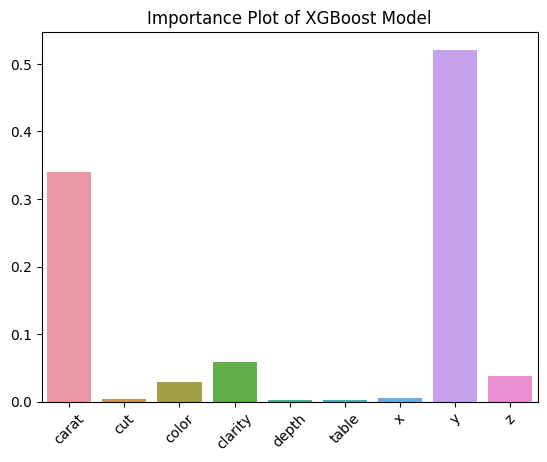

In [48]:
# 그리고 plot으로 그려서 확인까지!
import seaborn as sns

sns.barplot(x=train_input.columns, y=gs1_best.feature_importances_)
plt.xticks(rotation=45)
plt.title("Importance Plot of XGBoost Model")
plt.show()

결과 해석

xgboost로 학습한 모델의 특성중요도를 plot으로 그려서 확인해보니, 가장 중요하게 사용된 특성은 y였음!

그 다음으로 중요한 특성은 carat이었는데, 이렇게 두 특성에 거의 80% 이상을 의존해서 설명함!

문제9. 학습시킨 모델으로 Test Data를 예측하고, 이를 ‘Sample_submission.csv’의 price 열에 예측 값들을 채워주세요.
그 후, ‘Answer.csv’에 있는 Test Data의 실제 price 값과의 Test RMSE를 구한 후, CV를 진행했을 때 얻었던 Train RMSE와 함께 각 모델별로 비교해보세요.

1) XGBoost

In [59]:
sample = pd.read_csv('C:/Users/mrg07/Desktop/99shimshim/SKKU/PSAT/클린업/week2/week2_package/Sample_submission.csv')
sample['price'] = np.round(gs1_best.predict(test)) #반올림
sample.head()

,ID_code,price
0,test_1,5635.0
1,test_2,629.0
2,test_3,531.0
3,test_4,12079.0
4,test_5,1323.0


In [60]:
answer = pd.read_csv('C:/Users/mrg07/Desktop/99shimshim/SKKU/PSAT/클린업/week2/week2_package/answer.csv')
answer.head()

,ID_code,price
0,test_1,5667
1,test_2,638
2,test_3,450
3,test_4,12764
4,test_5,1326


In [70]:
test_rmse_1 = mean_squared_error(sample['price'], answer['price'], squared=False)
test_rmse_1 # 예측값과 정답값의 차이를 RSME로 표현

543.6299537516027

In [62]:
print(gs1.best_score_) # `greater_is_better=False`를 설정해줬었기 때문에 음수로 나옴

-304502.46347519575


In [64]:
train_rmse_1 = -gs1.best_score_
train_rsme_1 = np.sqrt(train_rmse_1)
train_rsme_1 # 비교할 수 있게 다시 계산해서 RSME로 바꿔줌!

551.8174186043748

XGBoost의 경우,
Test data로 true value를 예측한 RSME는 약 543.6이고
(CV 당시) Train data로 validation data를 예측한 RMSE는 약 551.8이다.
따라서, Test data에서 성능이 약간 더 좋은 과소적합이 발생했다고 볼 수 있다.
모델을 더 복잡하게 만들기 위해 learning_rate, n_estimators, max_depth 와 같은 파라미터들의 범위를 다르게 제시하거나, subsample 파라미터를 추가해볼 수도 있겠다.

2) LightGBM

In [75]:
sample['price'] = np.round(gs2_best.predict(test)) # LightGBM 모델로 예측한 price를 답안지에 기입
sample.head() # 숫자 너무 길어서 반올림해줌

,ID_code,price,price1,price_mean
0,test_1,5580.0,5635.0,5635.0
1,test_2,602.0,629.0,629.0
2,test_3,570.0,531.0,531.0
3,test_4,12141.0,12079.0,12079.0
4,test_5,1320.0,1323.0,1323.0


In [76]:
# 역시 마찬가지로 실제 정답지와 비교해보면
answer.head() # 오... 얘도 얼추 스케일은 들어맞네..!

,ID_code,price
0,test_1,5667
1,test_2,638
2,test_3,450
3,test_4,12764
4,test_5,1326


In [77]:
test_rmse_2 = mean_squared_error(sample['price'], answer['price'], squared=False)
test_rmse_2 # 이번에도 예측값과 정답값의 차이를 RSME로 표현하고

551.8447781083693

In [78]:
train_rmse_2 = -gs2.best_score_
train_rsme_2 = np.sqrt(train_rmse_2)
train_rsme_2 # 비교할 수 있게 RSME로 바꿔줌!

563.7928910173785

LightGMB의 경우,
Test data에 대해 예측한 RSME는 약 551.8이고
Train data에 대해 (CV 당시) 예측한 RMSE는 약 563.7이다.
따라서, 이 경우에도 Test data에서 성능이 약간 더 좋은 과소적합이 발생했다고 볼 수 있다.
역시 모델을 더 복잡하게 만들기 위해 learning_rate, n_estimators, max_depth 와 같은 파라미터들의 범위를 다르게 제시하거나, subsample 파라미터를 추가해볼 수 있겠다.

보너스문제 5

Ensemble은 여러개의 모델을 조합해서 그 결과를 뽑아 내는 방법이다.
정확도가 높은 강한 모델을 하나 사용하는 것보다,
정확도가 낮은 약한 모델을 여러개 조합 하는 방식이 정확도가 높다는 방법에 기반한 방법인데,
방식에 따라서 Bagging과 Boosting 으로 분류된다.

Bagging은 여러 모델을 사용할때, 각 모델에서 나온 값을 계산하여, 최종 결과값을 내는 방식이다.
Boosting은 원리가 다른데 먼저 m1~3 모델이 있을때, m1에는 x에서 샘플링된 데이터를 넣는다.
그리고, 나온 결과중에서, 예측이 잘못된 x중의 값들에 가중치를 반영해서 다음 모델인 m2에 넣는다.
마찬가지로 y2 결과에서 예측이 잘못된 x’에 값들에 가중치를 반영해서 m3에 넣는다. 
그리고, 각 모델의 성능이 다르기 때문에, 각 모델에 가중치 W를 반영한다.

https://bcho.tistory.com/1354

https://tyami.github.io/machine%20learning/ensemble-7-boosting-XGBoost-classification/

보너스 문제5. 앙상블 기법
앙상블 학습은 여러 개의 약한 모델을 결합함으로써 과적합은 줄이고 최종적인 성능은 높이는 학습방식이다.
정형 데이터를 다루는 머신러닝에서 특히 뛰어난 성능을 내며, 그 유형으로는 voting, bagging, boosting이 있다고 한다.

보너스 문제6

In [72]:
sample['price1'] = np.round(gs1_best.predict(test)) # XGBoost 모델로 예측한 price를 다시 답안지에 기입
sample.head()

,ID_code,price,price1
0,test_1,5635.0,5635.0
1,test_2,629.0,629.0
2,test_3,531.0,531.0
3,test_4,12079.0,12079.0
4,test_5,1323.0,1323.0


In [73]:
sample['price_mean'] = (sample['price1']+sample['price'])/2
sample.head()

,ID_code,price,price1,price_mean
0,test_1,5635.0,5635.0,5635.0
1,test_2,629.0,629.0,629.0
2,test_3,531.0,531.0,531.0
3,test_4,12079.0,12079.0,12079.0
4,test_5,1323.0,1323.0,1323.0


In [74]:
test_rmse_3 = mean_squared_error(sample['price_mean'], answer['price'], squared=False)
test_rmse_3 # 이번에도 예측값과 정답값의 차이를 RSME로 표현

543.6299537516027